    Problem:


    Traditional health monitoring systems often categorize patient health status using rigid, predefined thresholds that may not capture the nuanced variations across a diverse patient population. This can lead to oversimplified assessments and potentially overlook subtle yet critical patterns in health data. The challenge is to develop a more dynamic and responsive approach that utilizes unsupervised learning to identify natural groupings within health data, facilitating personalized and precise health management.

In [1]:
import pandas as pd
df= pd.read_csv('healthmonitoring.csv')
print(df.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

# EDA

In [2]:
df

PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0            1   69    Male  60.993428        130/85               15   
1            2   32    Male  98.723471        120/80               23   
2            3   78  Female  82.295377        130/85               13   
3            4   38  Female  80.000000        111/78               19   
4            5   41    Male  87.531693        120/80               14   
..         ...  ...     ...        ...           ...              ...   
495        496   61    Male  85.077820        135/76               22   
496        497   62  Female  99.925508        130/85               14   
497        498   49  Female  98.619323        120/80               16   
498        499   62    Male  99.248763        130/85               14   
499        500   78    Male  81.234401        130/85               22   

     BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0          98.885236       resting              95.0    excellent         low   
1          98.281883       walking              97.0         good        high   
2          98.820286       resting              98.0         fair        high   
3          98.412594       running              98.0         poor    moderate   
4          99.369871       resting              98.0         good         low   
..               ...           ...               ...          ...         ...   
495        98.243780       walking               NaN         poor    moderate   
496        98.859537       running              97.0    excellent    moderate   
497        98.228169       running              99.0         good    moderate   
498        97.185764       resting               NaN         poor         low   
499        98.614517       resting              94.0         fair        high   

                      Timestamp  
0    2024-04-26 17:28:55.286711  
1    2024-04-26 17:23:55.286722  
2    2024-04-26 17:18:55.286726  
3    2024-04-26 17:13:55.286728  
4    2024-04-26 17:08:55.286731  
..                          ...  
495  2024-04-25 00:13:55.288556  
496  2024-04-25 00:08:55.288558  
497  2024-04-25 00:03:55.288560  
498  2024-04-24 23:58:55.288562  
499  2024-04-24 23:53:55.288565  

[500 rows x 12 columns]

In [3]:
df.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [4]:
df['OxygenSaturation'].value_counts()

OxygenSaturation
94.0    62
97.0    61
96.0    59
98.0    54
99.0    51
95.0    50
Name: count, dtype: int64

In [5]:
df['BodyTemperature']=df['BodyTemperature'].fillna(df['BodyTemperature'].median())
df['OxygenSaturation']=df['OxygenSaturation'].fillna(df['OxygenSaturation'].median())

In [6]:
df.isnull().sum()

PatientID           0
Age                 0
Gender              0
HeartRate           0
BloodPressure       0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
Timestamp           0
dtype: int64

In [7]:
!pip install ydata-profiling

In [8]:
import pandas as pd

In [9]:
import ydata_profiling

In [10]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df.corr(numeric_only=True)

PatientID       Age  HeartRate  RespiratoryRate  \
PatientID          1.000000  0.012568   0.005817        -0.008226   
Age                0.012568  1.000000  -0.055109         0.011530   
HeartRate          0.005817 -0.055109   1.000000         0.079749   
RespiratoryRate   -0.008226  0.011530   0.079749         1.000000   
BodyTemperature   -0.044626 -0.014600   0.006981         0.057665   
OxygenSaturation   0.061845 -0.099088   0.019462         0.036360   

                  BodyTemperature  OxygenSaturation  
PatientID               -0.044626          0.061845  
Age                     -0.014600         -0.099088  
HeartRate                0.006981          0.019462  
RespiratoryRate          0.057665          0.036360  
BodyTemperature          1.000000         -0.001025  
OxygenSaturation        -0.001025          1.000000

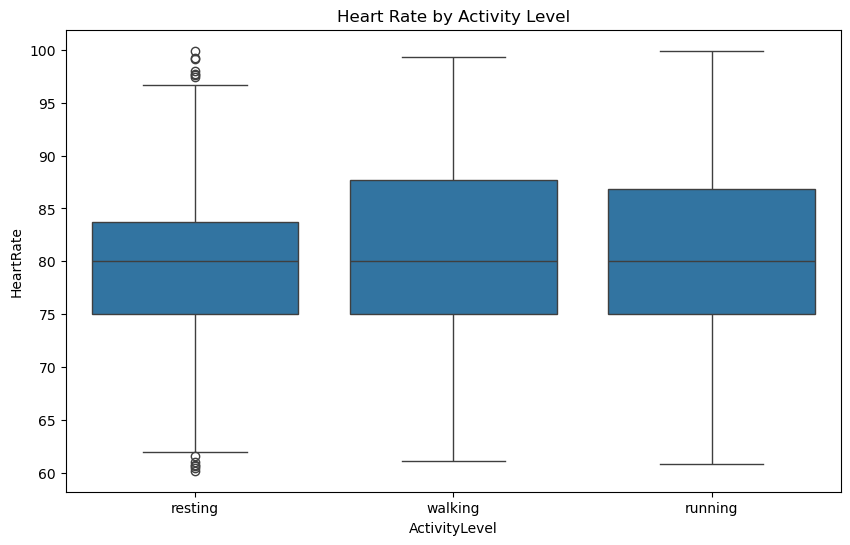

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=df)
plt.title('Heart Rate by Activity Level')
plt.show()  # If you want to display the plot

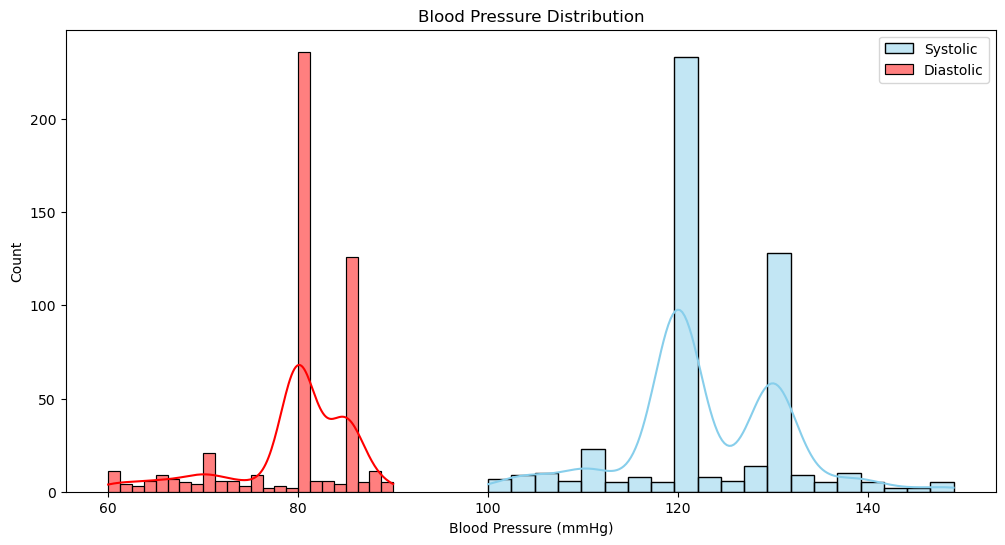

In [13]:
# extracting systolic and diastolic blood pressure for analysis
df[['SystolicBP', 'DiastolicBP']] = df['BloodPressure'].str.split('/', expand=True).astype(int)

# blood pressure distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['SystolicBP'], color="skyblue", label="Systolic", kde=True)
sns.histplot(df['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()


In [14]:
df

PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0            1   69    Male  60.993428        130/85               15   
1            2   32    Male  98.723471        120/80               23   
2            3   78  Female  82.295377        130/85               13   
3            4   38  Female  80.000000        111/78               19   
4            5   41    Male  87.531693        120/80               14   
..         ...  ...     ...        ...           ...              ...   
495        496   61    Male  85.077820        135/76               22   
496        497   62  Female  99.925508        130/85               14   
497        498   49  Female  98.619323        120/80               16   
498        499   62    Male  99.248763        130/85               14   
499        500   78    Male  81.234401        130/85               22   

     BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0          98.885236       resting              95.0    excellent         low   
1          98.281883       walking              97.0         good        high   
2          98.820286       resting              98.0         fair        high   
3          98.412594       running              98.0         poor    moderate   
4          99.369871       resting              98.0         good         low   
..               ...           ...               ...          ...         ...   
495        98.243780       walking              96.0         poor    moderate   
496        98.859537       running              97.0    excellent    moderate   
497        98.228169       running              99.0         good    moderate   
498        97.185764       resting              96.0         poor         low   
499        98.614517       resting              94.0         fair        high   

                      Timestamp  SystolicBP  DiastolicBP  
0    2024-04-26 17:28:55.286711         130           85  
1    2024-04-26 17:23:55.286722         120           80  
2    2024-04-26 17:18:55.286726         130           85  
3    2024-04-26 17:13:55.286728         111           78  
4    2024-04-26 17:08:55.286731         120           80  
..                          ...         ...          ...  
495  2024-04-25 00:13:55.288556         135           76  
496  2024-04-25 00:08:55.288558         130           85  
497  2024-04-25 00:03:55.288560         120           80  
498  2024-04-24 23:58:55.288562         130           85  
499  2024-04-24 23:53:55.288565         130           85  

[500 rows x 14 columns]

In [15]:
d={'Male':0,'Female':1}
df['Gender']=df['Gender'].map(d)

In [16]:
del df['Timestamp']

In [17]:
d={'low':0,'moderate':1,'high':2}
df['StressLevel']=df['StressLevel'].map(d)

In [18]:
d={'poor':0,'fair':1,'good':2,'excellent':3}
df['SleepQuality']=df['SleepQuality'].map(d)

In [19]:
df['SleepQuality'].value_counts()

SleepQuality
2    135
3    132
1    126
0    107
Name: count, dtype: int64

In [20]:
df['ActivityLevel'].value_counts()

ActivityLevel
resting    181
running    167
walking    152
Name: count, dtype: int64

In [21]:
d={'resting':0,'walking':1,'running':2}
df['ActivityLevel']=df['ActivityLevel'].map(d)

In [22]:
df.drop('BloodPressure', axis=1, inplace=True)

In [23]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'HeartRate', 'RespiratoryRate',
       'BodyTemperature', 'ActivityLevel', 'OxygenSaturation', 'SleepQuality',
       'StressLevel', 'SystolicBP', 'DiastolicBP'],
      dtype='object')

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
x=df[['Age', 'Gender', 'HeartRate', 'RespiratoryRate',
       'BodyTemperature', 'ActivityLevel', 'OxygenSaturation', 'SleepQuality',
       'StressLevel', 'SystolicBP', 'DiastolicBP']]

In [28]:
model=KMeans(4)

In [29]:
model=model.fit(x)

In [30]:
tahmin=model.predict(x)

In [31]:
x['cluster']=tahmin

In [32]:
silhouette_score(x,tahmin)

0.29788079815239393

In [33]:
#wcss= within cluster sum of squares

wcss=[]

ss=[]

for i in range(2,10):

    model=KMeans(i)

    model=model.fit(x)

    tahmin=model.predict(x)

    ss1=silhouette_score(x,tahmin)

    ss.append(ss1)

    print(ss1)

    wcss.append(model.inertia_)
    

0.4159551796835565
0.3088390974670791
0.29788079815239393
0.2634931283478522
0.28079613106911927
0.25793014639828704
0.25729490921725096
0.2512255760335511


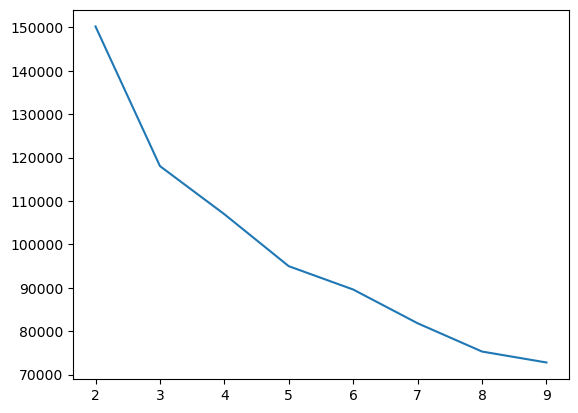

In [34]:
plt.plot(range(2,10),wcss)

In [35]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
from yellowbrick.cluster import KElbowVisualizer

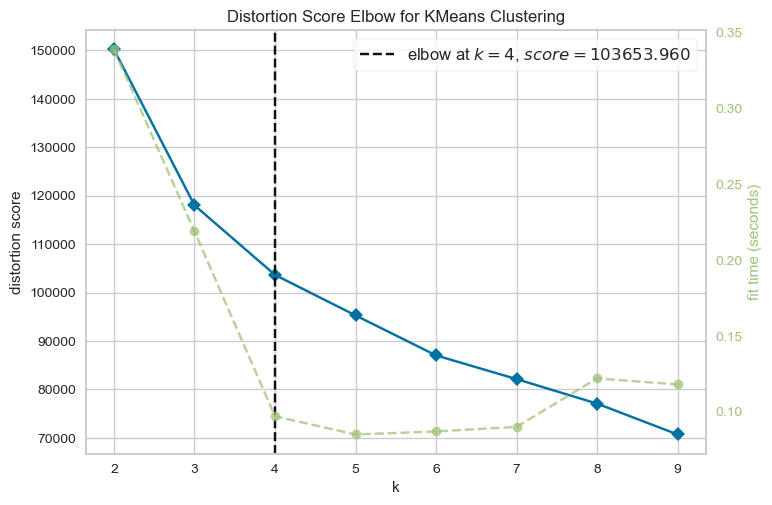

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10)) 
vis.fit(x)
vis.show()

In [38]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [39]:
data=linkage(x,method='ward',metric='euclidean')

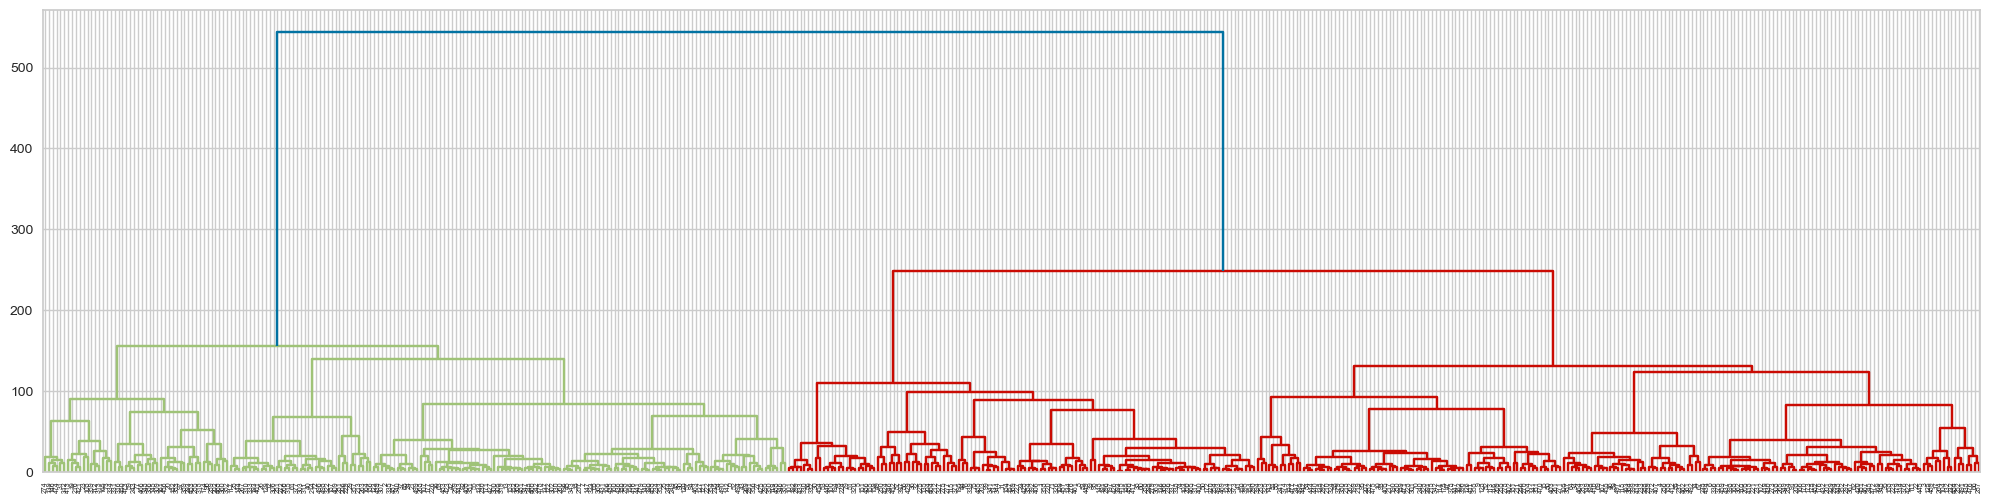

In [40]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [41]:
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

In [42]:
df['AgeGroup'] = df['Age'].apply(age_group)

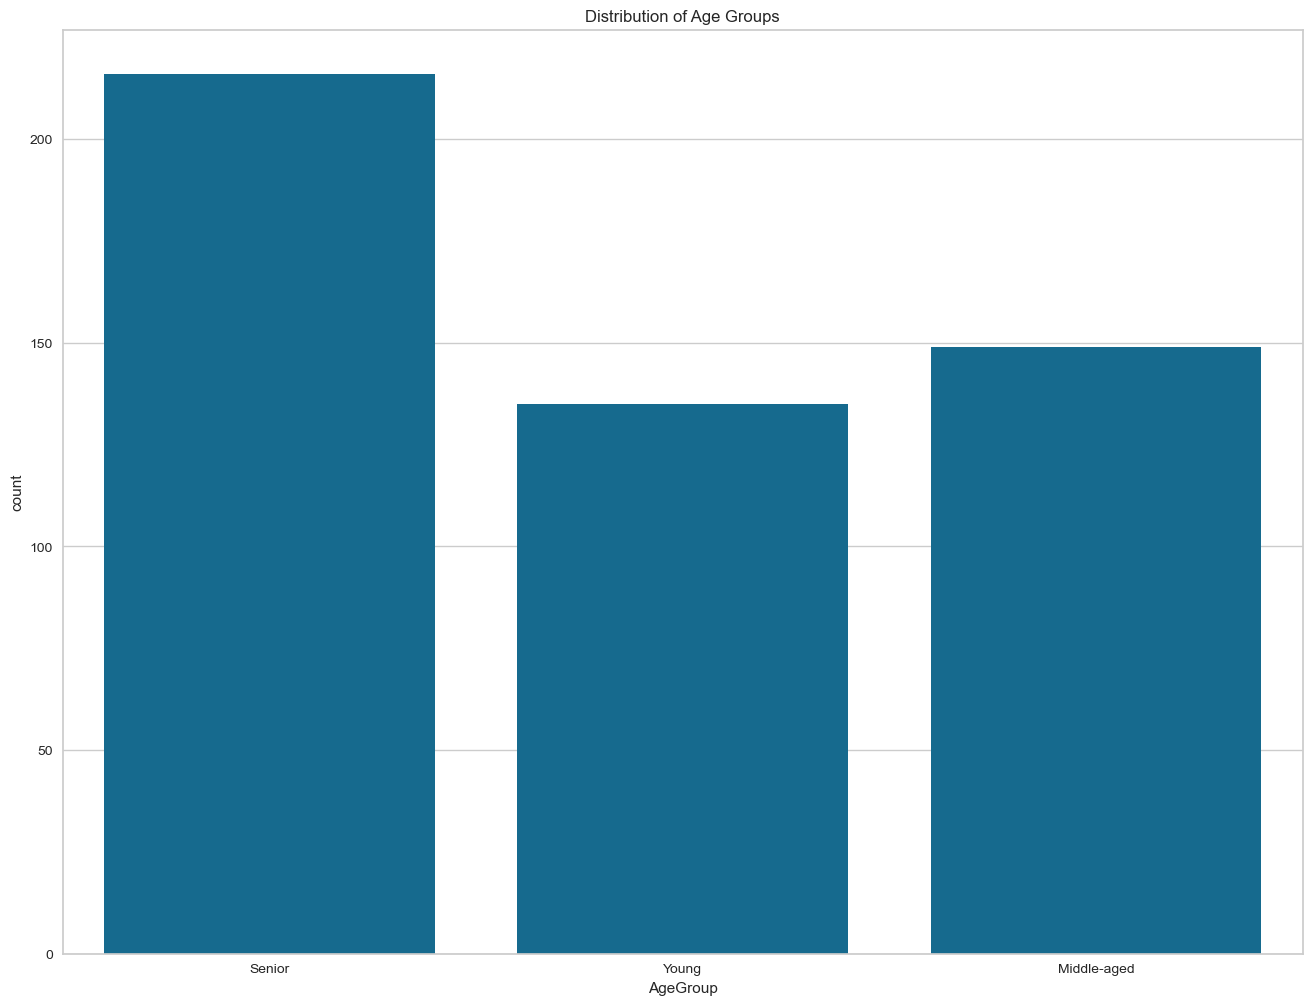

In [48]:
fig, axes = plt.subplots(figsize=(16, 12))  # Create a single figure and axes

# Age Group count plot
sns.countplot(x='AgeGroup', data=df, ax=axes)  # Use 'axes' directly
axes.set_title('Distribution of Age Groups')

plt.show()  # Display the plot

In [49]:
# function to categorize Blood Pressure
def bp_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

In [53]:
df['BPCategory'] = df.apply(lambda x: bp_category(x['SystolicBP'], x['DiastolicBP']), axis=1)

NameError: name 'set_title' is not defined

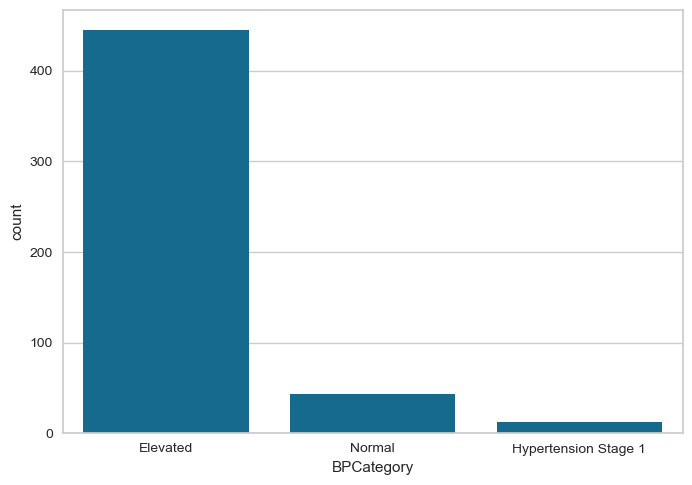

In [55]:
sns.countplot(x='BPCategory', data=df)
set_title('Distribution of Blood Pressure Categories')